# PAP2.2 _ Versuch 253

Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.special import gamma
from numpy import exp, sqrt, pi, math
from math import factorial as fctl
from uncertainties import ufloat, unumpy as unp
from uncertainties import umath

Definitionen

In [2]:
def chi_2(f, fit, x, y, yerr, name = ''):
    chi_sq = np.sum( (f(x, *fit) - y)**2 / yerr **2)
    dof = len(y) - len(fit)
    chi_sq_red = chi_sq / dof
    prob = round(1 - chi2.cdf(chi_sq, dof), 3) * 1e2
    if name == '':
        print('chi_sq = ' + str(chi_sq), '\nchi_sq_red = ' + str(chi_sq_red), '\nFitwkt = ' + str(prob) + '%')
    else:
        print(name, 'chi_sq = ' + str(chi_sq), '\nchi_sq_red = ' + str(chi_sq_red), '\nFitwkt = ' + str(prob) + '%')
    return np.array([chi_sq, chi_sq_red, prob])

def perr(pcov):
    return np.sqrt(np.diag(pcov))

def uprint(name, value, error, unit = ''):
    print(name + str(ufloat(value, error)) + '  ' + unit)
    return np.array([ufloat(value, error)])


In [3]:
def gauß(x, A, mu, sig): # A: Fläche der Gaußfunktion
    return A / (sqrt(2 * pi) * sig) * exp (- (x-mu)**2 / 2 / sig**2)
def poisson(x, A_p, mu_p):
    return A_p * exp(-mu_p) * mu_p**x / gamma(x+1)
def binomial(n, k, p):
    return fctl(n) / (fctl(n-k) * fctl(k)) * (p **k) * ((1-p) **(n-k)) 
def lin(x, a, b): 
    return x * a + b
def twoexp(x, A1, l1, A2, l2):
    return A1 * np.exp(-x*l1) + A2 * np.exp(-x*l2)
def oneexp(x, A, l):
    return A * np.exp(-x*l)

Part I: beta radiation

Simple plot

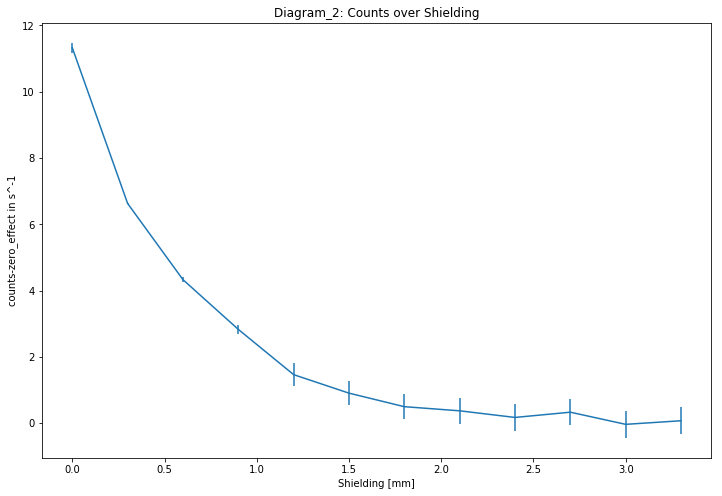

In [4]:
# Simple plot

##I.1Plotting counts over absorber thickness

# x axis values: Width in mm
width = np.array([0,0.3,0.6,0.9,1.2,1.5,1.8,2.1,2.4,2.7,3.0,3.3])

# measured counts
counts = np.array([354,213,144,99,232,165,116,101,77,96,52,65])
#error
counts_error = np.sqrt(counts)
# measurement's time in s:
time = np.array([30,30,30,30,120,120,120,120,120,120,120,120])
# zero-effect normed by time [s^-1]:
zero_b = 142/(300)*np.ones(len(counts))
# corresponding y axis values:
normedcounts=(counts/time)-zero_b
# correspoding errors
normedcounts_error = (counts_error/time)-zero_b

# plot 
plt.figure(figsize=(12,8))
plt.errorbar(width,normedcounts,yerr=normedcounts_error) 

#features
plt.title('Diagram_2: Counts over Shielding')
plt.ylabel('counts-zero_effect in s^-1')
plt.xlabel ('Shielding [mm]')

#save
plt.savefig("Diagram_2.pdf",format="pdf")



linear fit

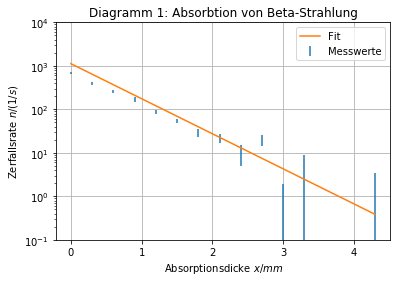

In [5]:
# Werte - Array mit Wert und Fehler wenn vorhanden
n0 = np.array([112, 11]) # Nulleffekt über 5min
n0b = np.array([142, 12]) # Nulleffekt über 5min

# beta Strahlung
db = np.array([6.1, 0.1]) # Abstand zum Kollimator in cm
tb = np.array([30, 30, 30, 30, 120, 120, 120, 120, 120, 120,120, 120, 300]) # Messdauer [s]
Nb = np.array([354,213,144,99,232,165,116,101,77,96,52,65,142]) # Zahl der Zerfälle
dNb = np.sqrt(Nb)
xb = np.array([0, 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3.0, 3.3, 4.3]) # Absorberdicke [mm]
nb = np.array([ Nb/tb*60 - n0b[0]/5, np.sqrt((dNb/tb*60)**2 + (n0b[1]/5)**2) ]) # Zählrate

# Aufgabe 1 beta Strahlung
rg = np.array([8, 11]) # fitte linearen Bereich
popt, pcov = curve_fit(oneexp, xb[rg[0]:rg[1]], nb[0, rg[0]:rg[1]], sigma=nb[1, rg[0]:rg[1]])
pbeta = np.array([popt, perr(pcov)])

# Plot
plt.errorbar(xb, nb[0], yerr=nb[1], fmt='', linestyle='none', label='Messwerte')
plt.plot(xb, oneexp(xb, *popt), label='Fit')
plt.title('Diagramm 1: Absorbtion von Beta-Strahlung')
plt.xlabel('Absorptionsdicke $x/mm$')
plt.ylabel('Zerfallsrate $n/(1/s)$')
plt.ylim((1e-1, 1e4))
plt.yscale('log')
plt.grid()
plt.legend(loc='best')
plt.savefig("plot 1.pdf", format="pdf")

Part II:  Absorption of gamma-radiation

Schwächungskoeffizient mu = 0.68+/-0.06  1/cm
Massenschwächungskoeffizient 0.060+/-0.005  cm^2/g


array([0.05958870049086409+/-0.004933269941493307], dtype=object)

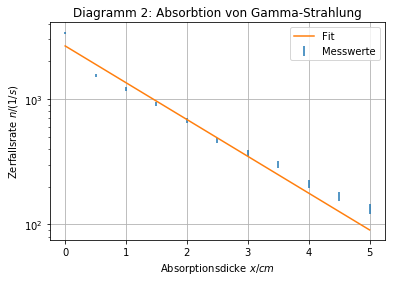

In [8]:
# gamma Strahlung
dy = np.array([14.9, 0.1]) # Abstand zum Kollimator in cm
ty = 1 # Messdauer [min]
Ny = np.array([3372,1552,1224,932,697,493,393,324,231,189,155]) # Zahl der Zerfälle
dNy = np.sqrt(Ny)
xy = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]) # Absorberdicke [cm]
ny = np.array([ Ny - n0[0]/5, np.sqrt((dNy)**2 + (n0[1]/5)**2) ]) # Zählrate


#rg = np.array([1, len(xy)])
popt, pcov = curve_fit(oneexp, xy, ny[0], sigma=ny[1])
pgamma = np.array([popt, perr(pcov)])

# Plot
plt.errorbar(xy, ny[0], yerr=ny[1], fmt='', linestyle='none', label='Messwerte')
plt.plot(xy, oneexp(xy, *popt), label='Fit')
plt.title('Diagramm 2: Absorbtion von Gamma-Strahlung')
plt.xlabel('Absorptionsdicke $x/cm$')
plt.ylabel('Zerfallsrate $n/(1/s)$')
#plt.ylim((10, 1e4))
plt.yscale('log')
plt.grid()
plt.legend(loc='best')
plt.savefig("diagram 3.pdf", format="pdf")

#chi_2(oneexp, pgamma[0], xy, ny[0], ny[1])
uprint('Schwächungskoeffizient mu = ', pgamma[0,1], pgamma[1,1], '1/cm')
# Massenschwächungskoeffizient
rho_pb = 11.342 # [g/cm^3]
a = pgamma[0:2,1] / rho_pb # [cm^2/g]
uprint('Massenschwächungskoeffizient ', a[0], a[1], 'cm^2/g')


Part IV: Absorption of alpha-radiation

/usr/lib/python3/dist-packages/scipy/optimize/minpack.py:794: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


pressure where activity halved:
355.233+-0.0 mbar


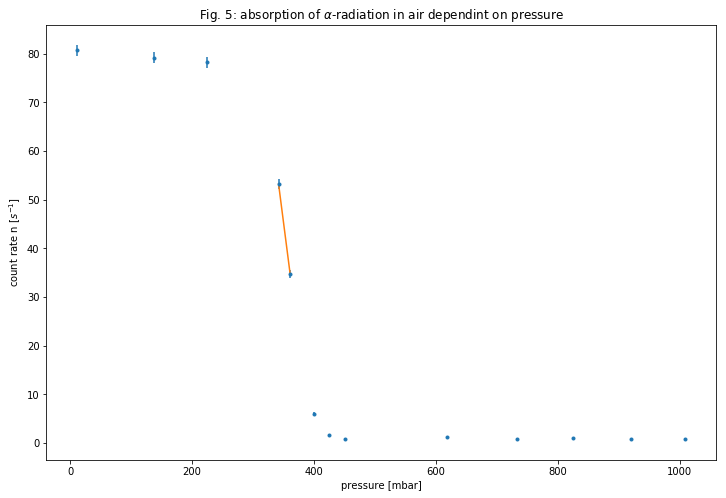

In [10]:
p = np.array([12,137,225,342,361,400,425,451,619,733,826,921,1009])
i = p.argsort()
p.sort()

alpha = np.array([4864,4772,4717,3217,2106,385,125,75,93,68,79,66,78])
a = alpha[i]/60 - .373
da=np.sqrt(a*60)/60
dp=1
plt.figure(figsize=(12,8))
plt.errorbar(p,a,yerr=da,xerr=dp, fmt=".")
#plt.yscale("log")
plt.ylabel("count rate n [$s^{-1}$]")
plt.xlabel("pressure [mbar]")
plt.title("Fig. 5: absorption of $\\alpha$-radiation in air dependint on pressure")
def line(x, m, b):
    return m*x+b

popt, pcov=curve_fit(line,p[3:-8],a[3:-8],sigma=da[3:-8])
plt.plot(p[3:-8],line(p[3:-8],*popt), label="Fit")
print("pressure where activity halved:")
pr = (a[0]/2 - popt[1])/popt[0]
prp = (a[0]/2 - popt[1])/(popt[0]+np.sqrt(pcov[0,0]))
prn = (a[0]/2 - popt[1])/(popt[0]-np.sqrt(pcov[0,0]))
diff = (prp-pr +pr-prn)/2
print(str(round(pr,3)) + "+-" + str(round(diff,3)) + " mbar")
plt.savefig("diagram 4.pdf", format="pdf")